# Подбор параметров

## Кросс-валидация

 ## Оценка параметров модели
 Нам нужно как-то оценивать качество создаваемых нами моделей. Идея тренировать и тестировать модели на одних и тех же данных - плохая (модели будут переобучаться).

Решение этой проблемы номер 1:

* Разделять данные на 2 группы: для обучения и тестирования

In [113]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

#from jupyterthemes import jtplot
#jtplot.style()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# Практика. Сделайте 20 разных train_test_split и обучите на них KNN-классификатор. Оцените качество на тестовой выборке

In [12]:
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    print(i, clf.score(X_test, y_test))

0 0.9333333333333333
1 1.0
2 1.0
3 0.9333333333333333
4 0.9666666666666667
5 0.9666666666666667
6 0.9333333333333333
7 0.9666666666666667
8 0.9333333333333333
9 0.9
10 0.9666666666666667
11 1.0
12 1.0
13 1.0
14 1.0
15 0.9333333333333333
16 1.0
17 0.9666666666666667
18 1.0
19 0.9333333333333333


## Конец практики

**Проблема** - качество модели имеет высокую дисперсию (high variance), т.к. примеры и в тестовой и в обучающей выборке могут значимо повлиять на полученную оценку

Решение - разобъем нашу выборку на несколько групп. Одну используем для теста, на остальных обучаем. После чего меняем группу для теста и повторяем. Усредняем полученное качество на каждой из выборок для оценки итогового качества модели

<img src="cross_validation_diagram.png" />

## Практика. Сделайте cross_val_score для KNN

In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=20)
print(scores)
print( 'Mean : ', scores.mean() )

[1.         1.         0.88888889 1.         1.         1.
 0.88888889 0.88888889 1.         1.         1.         0.83333333
 1.         1.         1.         1.         1.         1.
 1.         1.        ]
Mean :  0.975


## Конец практики

# Подбор оптимального количестов соседей через CrossValidationScore

In [81]:
knn_neighbors = []
knn_scores = []
for i in range(1, 30):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    knn_neighbors.append(i)
    knn_scores.append(cross_val_score(clf, X, y, cv=20, scoring='accuracy').mean())

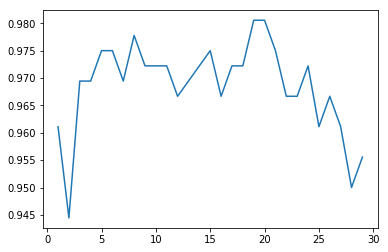

In [83]:
plt.plot(knn_neighbors, knn_scores)

In [87]:
print(np.argmax(knn_scores))

18


## Практика. Подберите оптимальное количество соседей на основе cross_val_score

## Конец практики

## GridSearchCV
В некоторым смысле - эта функция более продвинутая версия цикла for, описанного выше

In [88]:
from sklearn.model_selection import GridSearchCV

In [89]:
# define the parameter values that should be searched
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [90]:
# create a parameter grid: map the parameter names to the values that should be searched
# simply a python dictionary
# key: parameter name
# value: list of values that should be searched for that parameter
# single key-value pair for param_grid
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [92]:
# instantiate the grid
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

Полученный объект будет перебирать параметр "количество соседей" у KNN, делать кросс-валидацию и оценивать качество, используя accuracy в качестве метрики.
n_jobs=-1 заставляет параллелить вычисления по всем ядрам вашего компьютера

In [93]:
# fit the grid with data
grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [94]:
# view the complete results (list of named tuples)
for k in grid.cv_results_:
    print(k, ":", grid.cv_results_[k][0])

mean_fit_time : 0.0012311220169067382
std_fit_time : 0.0012910608527547504
mean_score_time : 0.0021476268768310545
std_score_time : 0.0014025763456142943
param_n_neighbors : 1
params : {'n_neighbors': 1}
split0_test_score : 1.0
split1_test_score : 0.9333333333333333
split2_test_score : 1.0
split3_test_score : 0.9333333333333333
split4_test_score : 0.8666666666666667
split5_test_score : 1.0
split6_test_score : 0.8666666666666667
split7_test_score : 1.0
split8_test_score : 1.0
split9_test_score : 1.0
mean_test_score : 0.96
std_test_score : 0.053333333333333316
rank_test_score : 24
split0_train_score : 1.0
split1_train_score : 1.0
split2_train_score : 1.0
split3_train_score : 1.0
split4_train_score : 1.0
split5_train_score : 1.0
split6_train_score : 1.0
split7_train_score : 1.0
split8_train_score : 1.0
split9_train_score : 1.0
mean_train_score : 1.0
std_train_score : 0.0


C:\Users\mi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\mi\Anaconda3\lib\site-packages\sklearn\utils\deprecatio

In [95]:
# create a list of the mean scores only
test_scores = grid.cv_results_['mean_test_score']
print(test_scores)

[0.96       0.95333333 0.96666667 0.96666667 0.96666667 0.96666667
 0.96666667 0.96666667 0.97333333 0.96666667 0.96666667 0.97333333
 0.98       0.97333333 0.97333333 0.97333333 0.97333333 0.98
 0.97333333 0.98       0.96666667 0.96666667 0.97333333 0.96
 0.96666667 0.96       0.96666667 0.95333333 0.95333333 0.95333333]


Text(0, 0.5, 'Cross-Validated Accuracy')

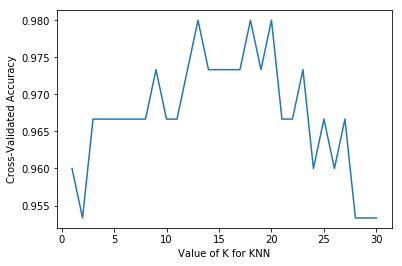

In [96]:
# plot the results
# this is identical to the one we generated above
plt.plot(k_range, test_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [15]:
# examine the best model

# Single best score achieved across all params (k)
print(grid.best_score_)

# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)

0.98
{'n_neighbors': 13}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')


## Практика. Постройте confusion_matrix для лучшего estimator'а

## Конец практики

## Перебор нескольких параметров одновременно

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно

In [101]:
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'])
print(param_grid)
grid = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')
grid.fit(X, y)
print('grid.best_score_ ', grid.best_score_)
print('grid.best_params_ ', grid.best_params_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
grid.best_score_  0.98
grid.best_params_  {'n_neighbors': 13, 'weights': 'uniform'}


## Конец практики

## RandomizedSearch
GridSearch просто перебирает все параметры. Он, конечно, найдет их самое оптимальное значение, но вопрос во времени. Итоговое количество комбинаций для GridSearchCV - $N_1*N_2*N_3 * ... * N_K$, где $N_i$ - количество возможных значений $i$-го параметра

RandomizedSearchCV - выбирает случайные значения из параметров и пробует запускать обучение с ними. Можно попробовать "пристреляться" к оптимальным значениям, а затем запустить GridSearch для уточнения

In [102]:
from sklearn.model_selection import RandomizedSearchCV

## Практика. Переберите параметры k (количество соседей) и weight (количество весов) одновременно при помощи RandomizedSearchCV

In [118]:
param_grid = dict(n_neighbors=k_range, weights=['uniform','distance'])
print(param_grid)
grid = RandomizedSearchCV(clf, param_grid, cv=10, n_iter=10, scoring='accuracy', n_jobs=-1)
grid.fit(X, y)
print('grid.best_score_ ', grid.best_score_)
print('grid.best_params_ ', grid.best_params_)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}
grid.best_score_  0.9733333333333334
grid.best_params_  {'weights': 'distance', 'n_neighbors': 24}


## Конец практики

## OOB Score

Напомним идею беггинга - выборка с повторением элементов из обучающего множества и обучение на этой выборке.
OOB-оценка - это оценка, когда для каждого $x_i$, используются только те классификаторы, которые до этого не видели $x_i$ в качестве обучающего примера

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
classifier = RandomForestClassifier(oob_score=True, n_estimators=20, max_depth=5)

In [121]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [122]:
print(classifier.oob_score_)
print(classifier.score(X_test,y_test))

0.975
0.8666666666666667


OOB-score позволяет не делать отдельный validation dataset, но обычно приводит к недооценке реального качества

# Практическая часть

In [123]:
from sklearn.datasets import load_digits

In [124]:
data = load_digits()

In [125]:
X, y = data['data'], data['target']

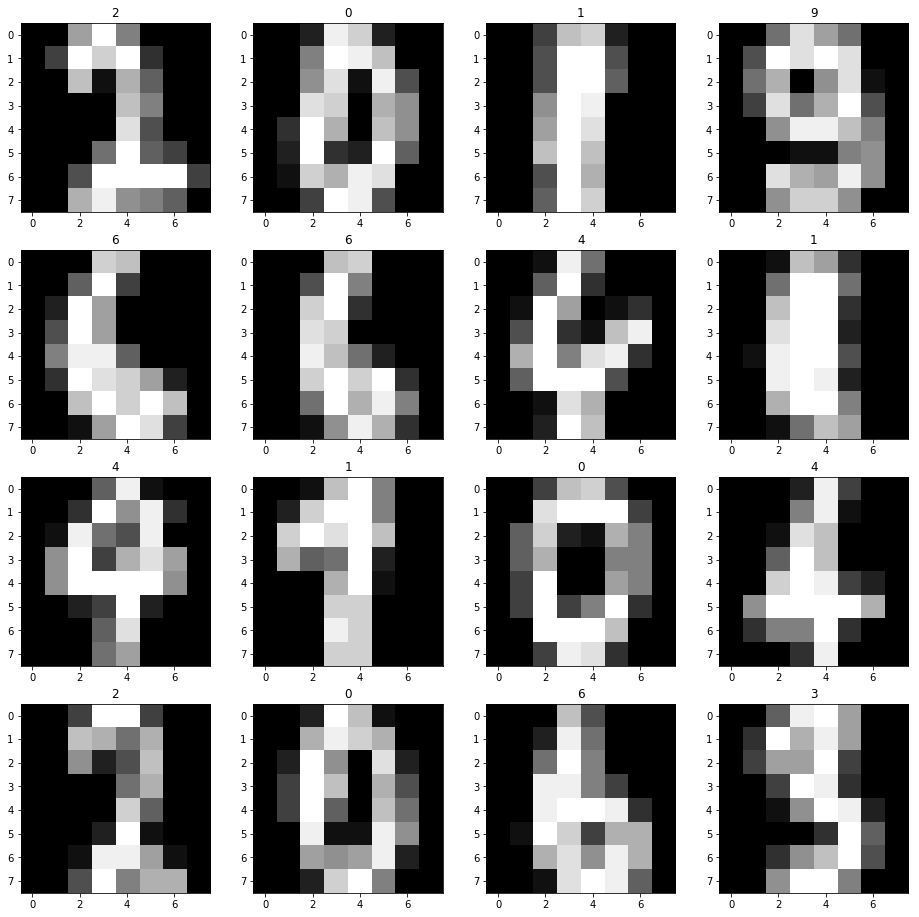

In [126]:
fig = plt.figure(figsize=(16,16))
for i in range(0, 4):
    for j in range(0,4):
        img = np.random.choice(len(X))
        plt.subplot(4, 4, i * 4 + j + 1)
        plt.imshow(X[img].reshape(8, 8), cmap='gray')
        plt.title(y[img])
plt.show()


In [127]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

# Практика. Возьмите 5 любых классификатор, подберите для них параметры и сравните итоговое качество на отложенной выборке

# Конец практики

# Домашняя работа
Взять boston house-prices datase (sklearn.datasets.load_boston) и сделать тоже самое для задачи регрессии (попробовать разные алгоритмы, поподбирать параметры, вывести итоговое качество)